In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE
df=pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: ylabel='cuisine'>

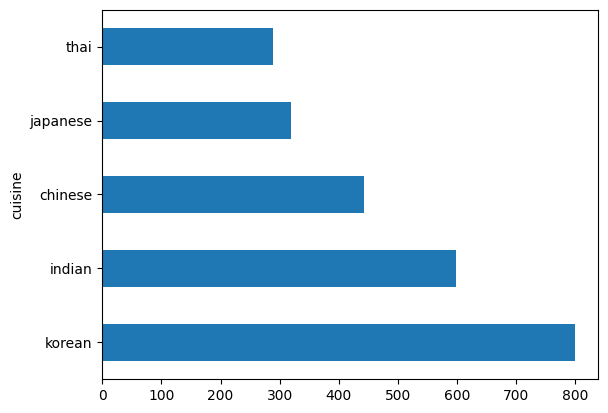

In [16]:
df.cuisine.value_counts().plot.barh()

In [17]:
thai_df=df[(df.cuisine ==  'thai')]
japanese_df=df[(df.cuisine=='japanese')]
chinese_df=df[df.cuisine=='chinese']
indian_df=df[df.cuisine=='india']
korean_df=df[(df.cuisine=='korean')]

In [18]:
def create_ingredient_df(df):
    ingredient_df=df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df=ingredient_df[(ingredient_df.T!=0).any()]
    ingredient_df=ingredient_df.sort_values(by='value',ascending=False,inplace=False)
    return ingredient_df

<Axes: >

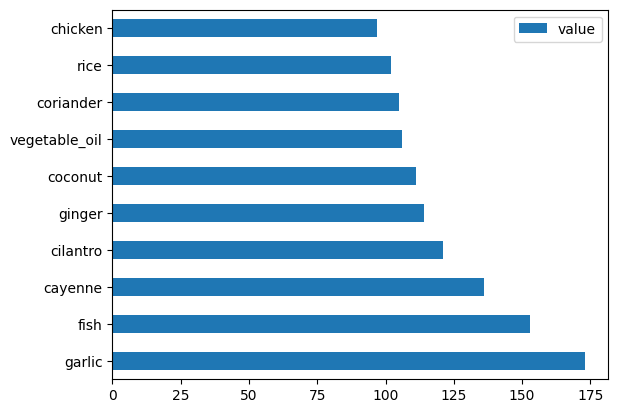

In [19]:
thai_ingredient_df=create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<Axes: >

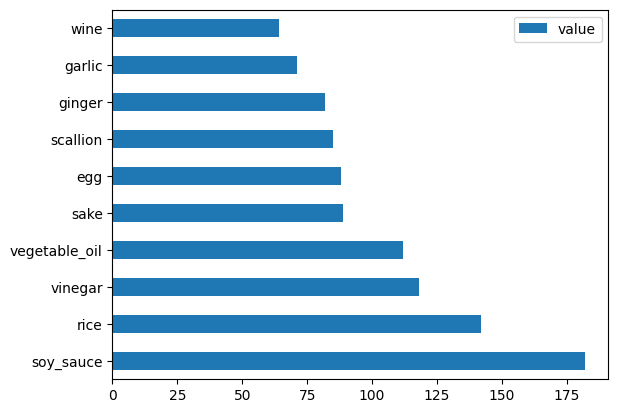

In [20]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

In [21]:
feature_df=df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'],axis=1)
labels_df=df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
oversample=SMOTE()
transformed_feature_df,transformed_label_df=oversample.fit_resample(feature_df,labels_df)
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count：{df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count：cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [23]:
transformed_df=pd.concat([transformed_label_df,transformed_feature_df],axis=1,join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv('../data/cleaned_cuisines.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [24]:
import pandas as pd
cuisines_df=pd.read_csv('../data/cleaned_cuisines.csv')
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,consensus_score,classification_report,precision_recall_curve
from sklearn.svm import SVC
import numpy as np
cuisines_label_df=cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [26]:
cuisines_feature_df=cuisines_df.drop(['Unnamed: 0','cuisine'],axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
X_train,X_test,y_train,y_test=train_test_split(cuisines_feature_df,cuisines_label_df,test_size=0.3)
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))
test= X_test.iloc[50].values.reshape(-1,1).T
proba = model.predict_proba(test)
classes=model.classes_
resultdf=pd.DataFrame(data=proba,columns=classes)
topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

Accuracy is 0.8090075062552127


d:\workspace\ai_study\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
thai,0.427388
japanese,0.385230
korean,0.162767
chinese,0.024578
indian,0.000038


In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.75      0.73      0.74       237
      indian       0.87      0.92      0.89       207
    japanese       0.80      0.74      0.77       272
      korean       0.84      0.81      0.82       240
        thai       0.80      0.87      0.83       243

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.81      0.81      0.81      1199



In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
C=10
classifiers={
    'Linear SVC':SVC(kernel='linear',C=C,probability=True,random_state=0),
    'KNN classifier':KNeighborsClassifier(C),
    'SVC':SVC(),
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
}

In [50]:
n_classifiers=len(classifiers)
for index,(name,classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'Accuracy (train) for {classifier}:{accuracy:.4f}')
    print(classification_report(y_test,y_pred))


Accuracy (train) for SVC(C=10, kernel='linear', probability=True, random_state=0):0.7890
              precision    recall  f1-score   support

     chinese       0.72      0.70      0.71       237
      indian       0.83      0.87      0.85       207
    japanese       0.80      0.75      0.77       272
      korean       0.83      0.76      0.79       240
        thai       0.77      0.88      0.82       243

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.79      1199

Accuracy (train) for KNeighborsClassifier(n_neighbors=10):0.6997
              precision    recall  f1-score   support

     chinese       0.57      0.70      0.63       237
      indian       0.81      0.77      0.79       207
    japanese       0.66      0.84      0.74       272
      korean       0.89      0.51      0.65       240
        thai       0.72      0.67      0.70       243

    accuracy                   